In [64]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.graphics.regressionplots import influence_plot
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler
# importing Standard Scaler
from sklearn.preprocessing import StandardScaler

In [85]:
#Read Data
statrtup= pd.read_csv('50_Startups.csv')
statrtup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [66]:
statrtup.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [67]:
statrtup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [68]:
#Checking null values
statrtup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

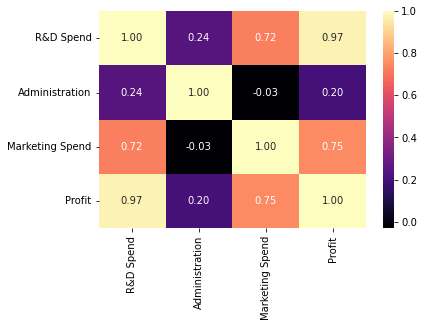

In [69]:
corre= statrtup.corr()
sns.heatmap(corre,cmap='magma',annot=True,fmt='.2f')
plt.show()

In [70]:
statrtup.shape

(50, 5)

In [71]:
statrtup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

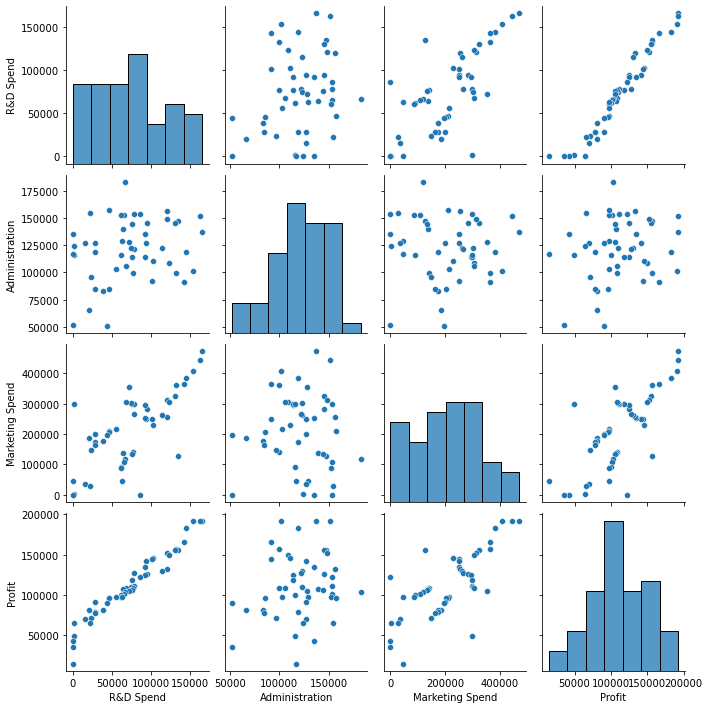

In [72]:
sns.pairplot(statrtup)
plt.show()

<AxesSubplot:xlabel='Profit', ylabel='Count'>

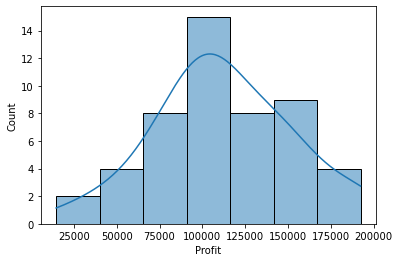

In [73]:
sns.histplot(data=statrtup.Profit,kde=True)

<AxesSubplot:xlabel='Profit'>

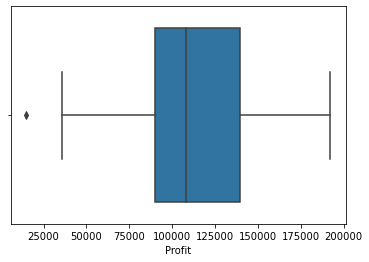

In [74]:
#Outliers find
sns.boxplot(x=statrtup['Profit'])

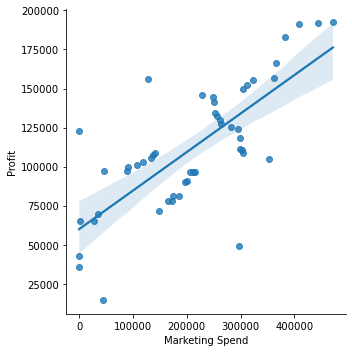

In [75]:
sns.lmplot(x='Marketing Spend',y='Profit',data=statrtup)

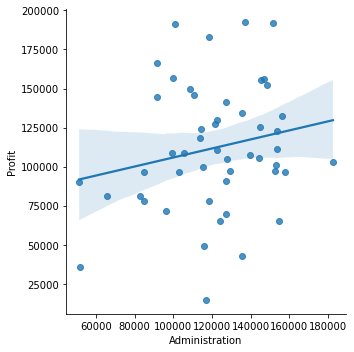

In [76]:
sns.lmplot(x='Administration',y='Profit',data=statrtup)

<AxesSubplot:xlabel='State', ylabel='Profit'>

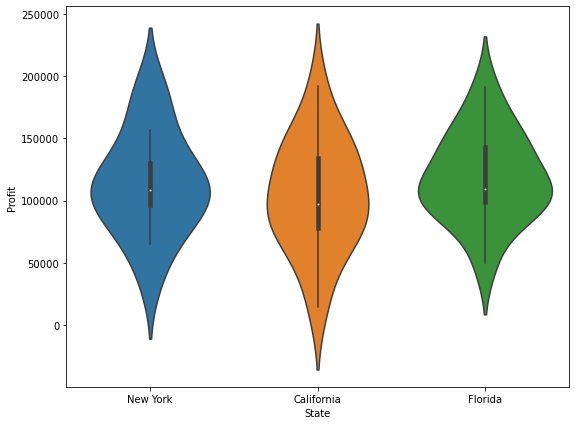

In [77]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = statrtup["State"], y = statrtup["Profit"] )

In [86]:
var={'New York':1,'California':2,'Florida':3}
statrtup['State']=statrtup['State'].map(var)
statrtup.groupby(statrtup['State'])['State'].count()

State
1    17
2    17
3    16
Name: State, dtype: int64

In [87]:
statrtup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,2,191792.06
2,153441.51,101145.55,407934.54,3,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,3,166187.94
5,131876.90,99814.71,362861.36,1,156991.12
6,134615.46,147198.87,127716.82,2,156122.51
7,130298.13,145530.06,323876.68,3,155752.60
8,120542.52,148718.95,311613.29,1,152211.77
9,123334.88,108679.17,304981.62,2,149759.96


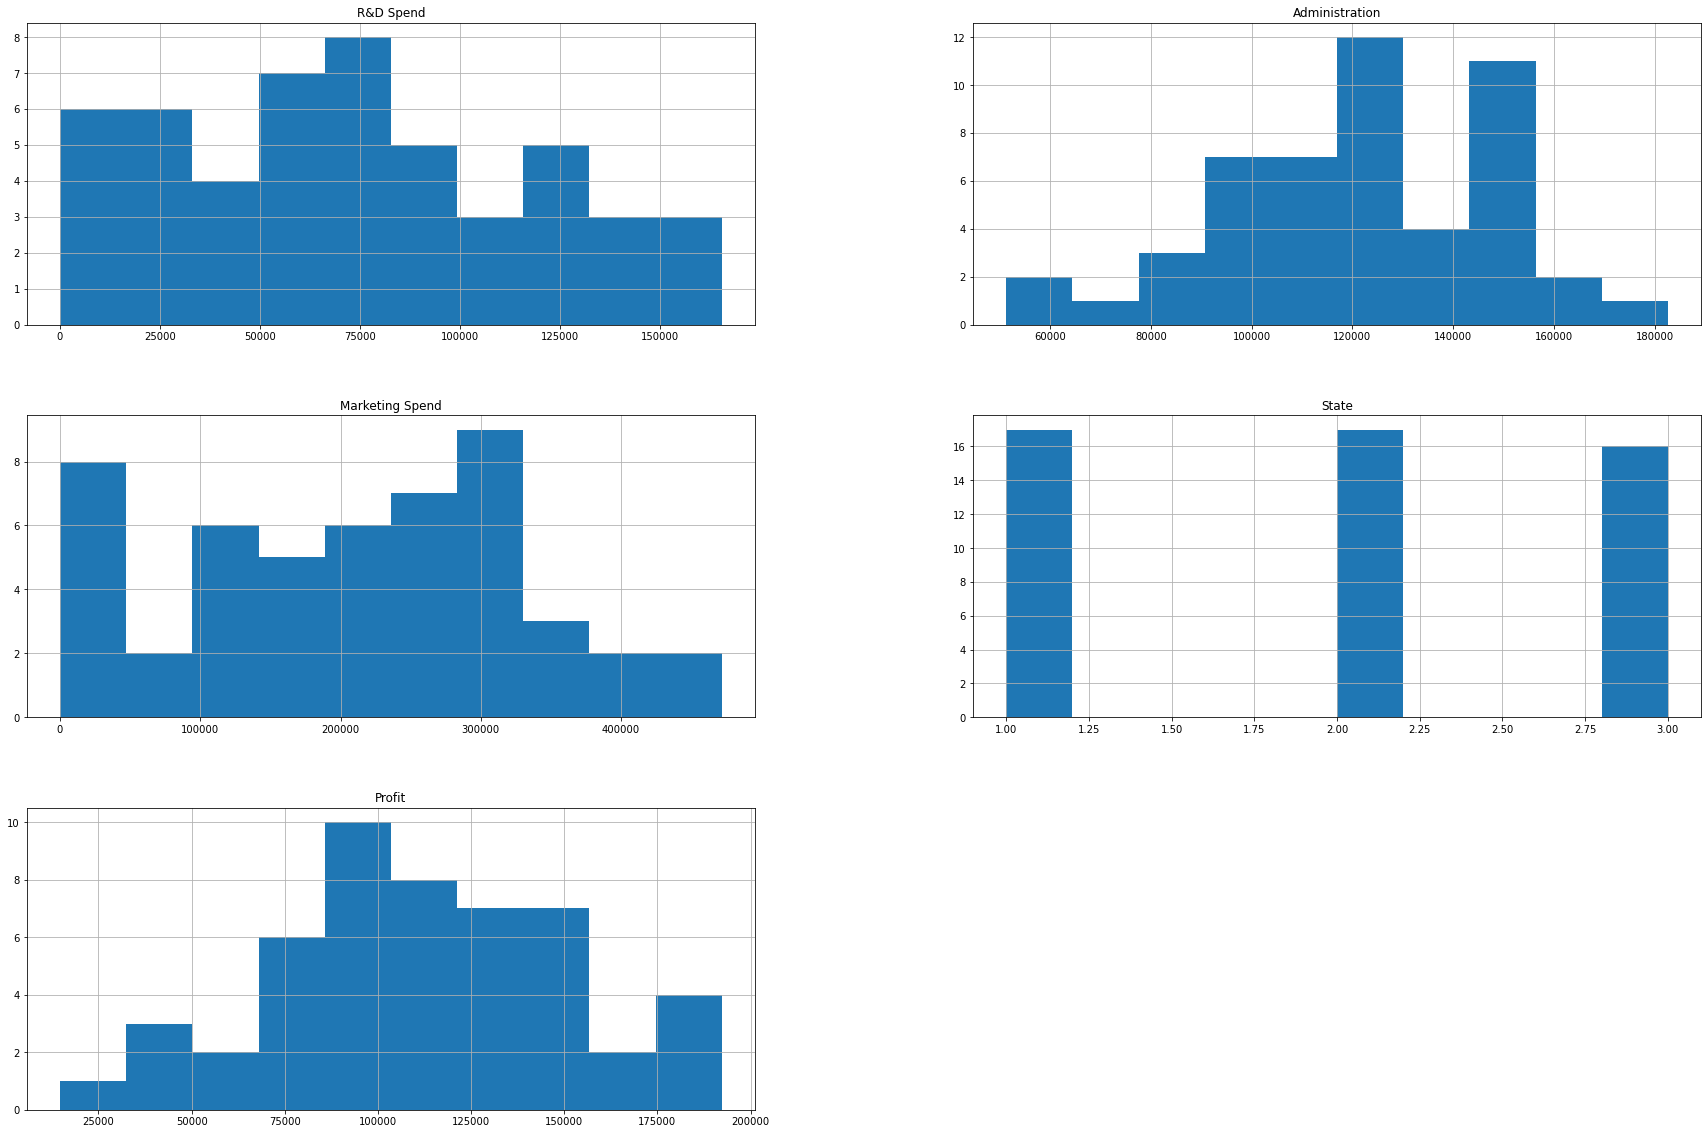

In [80]:
numeric_cols = statrtup.select_dtypes(include=np.number).columns.tolist()
statrtup[numeric_cols].hist(figsize=(30,20));

In [88]:
statrtup[['RDSpend']]=statrtup[['R&D Spend']]
statrtup[['Marketing_Spend']]=statrtup[['Marketing Spend']]
statrtup

,R&D Spend,Administration,Marketing Spend,State,Profit,RDSpend,Marketing_Spend
0,165349.20,136897.80,471784.10,1,192261.83,165349.20,471784.10
1,162597.70,151377.59,443898.53,2,191792.06,162597.70,443898.53
2,153441.51,101145.55,407934.54,3,191050.39,153441.51,407934.54
3,144372.41,118671.85,383199.62,1,182901.99,144372.41,383199.62
4,142107.34,91391.77,366168.42,3,166187.94,142107.34,366168.42
5,131876.90,99814.71,362861.36,1,156991.12,131876.90,362861.36
6,134615.46,147198.87,127716.82,2,156122.51,134615.46,127716.82
7,130298.13,145530.06,323876.68,3,155752.60,130298.13,323876.68
8,120542.52,148718.95,311613.29,1,152211.77,120542.52,311613.29
9,123334.88,108679.17,304981.62,2,149759.96,123334.88,304981.62


In [89]:
statrtup.drop(['R&D Spend'],inplace=True,axis=1)
statrtup.drop(['Marketing Spend'],inplace=True,axis=1)
statrtup

,Administration,State,Profit,RDSpend,Marketing_Spend
0,136897.80,1,192261.83,165349.20,471784.10
1,151377.59,2,191792.06,162597.70,443898.53
2,101145.55,3,191050.39,153441.51,407934.54
3,118671.85,1,182901.99,144372.41,383199.62
4,91391.77,3,166187.94,142107.34,366168.42
5,99814.71,1,156991.12,131876.90,362861.36
6,147198.87,2,156122.51,134615.46,127716.82
7,145530.06,3,155752.60,130298.13,323876.68
8,148718.95,1,152211.77,120542.52,311613.29
9,108679.17,2,149759.96,123334.88,304981.62


In [90]:
# Normalize dataset
statrtup_sca= (statrtup-np.min(statrtup))/(np.max(statrtup)-np.min(statrtup))
statrtup_sca

,Administration,State,Profit,RDSpend,Marketing_Spend
0,0.651744,0.0,1.000000,1.000000,1.000000
1,0.761972,0.5,0.997355,0.983359,0.940893
2,0.379579,1.0,0.993178,0.927985,0.864664
3,0.512998,0.0,0.947292,0.873136,0.812235
4,0.305328,1.0,0.853171,0.859438,0.776136
5,0.369448,0.0,0.801382,0.797566,0.769126
6,0.730161,0.5,0.796490,0.814128,0.270710
7,0.717457,1.0,0.794407,0.788018,0.686493
8,0.741733,0.0,0.774468,0.729018,0.660500
9,0.436929,0.5,0.760661,0.745906,0.646443


In [92]:
model1= smf.ols('Profit~RDSpend+Administration+Marketing_Spend+State',data=statrtup_sca).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 11 Jan 2022   Prob (F-statistic):           8.49e-29
Time:                        03:56:57   Log-Likelihood:                 78.976
No. Observations:                  50   AIC:                            -148.0
Df Residuals:                      45   BIC:                            -138.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1913      0.026      7.493      0.000       0.140       0.243
RDSpend             0.7505      0.043     17.569      0.000       0.664       0.837
Administration     -0.0200      0.038     -0.523      0.604      -0.097       0.057
Marketing_Spend     0.0718      0.045      1.602      0.116      -0.018       0.162
State               0.0013      0.019      0.072      0.943      -0.036       0.039
==============================================================================
Omnibus:                       14.842   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.489
Skew:                          -0.948   Prob(JB):                     2.16e-05
Kurtosis:                       5.592   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model1.params

Intercept          0.191346
RDSpend            0.750531
Administration    -0.019963
Marketing_Spend    0.071802
State              0.001335
dtype: float64

In [94]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept           7.493480
RDSpend            17.568861
Administration     -0.522554
Marketing_Spend     1.602332
State               0.071850
dtype: float64 
 Intercept          1.900781e-09
RDSpend            9.017776e-22
Administration     6.038483e-01
Marketing_Spend    1.160794e-01
State              9.430398e-01
dtype: float64


In [95]:
(model1.rsquared,model1.rsquared_adj)

(0.9507516438334586, 0.9463740121742105)

C:\Users\rahul\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


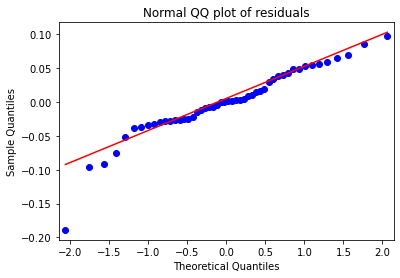

In [96]:
#Test for normality of residual(qqplot)
qqplot= sm.qqplot(model1.resid,line='q')
plt.title('Normal QQ plot of residuals')
plt.show()

In [97]:
#cooks distance to find outliers
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

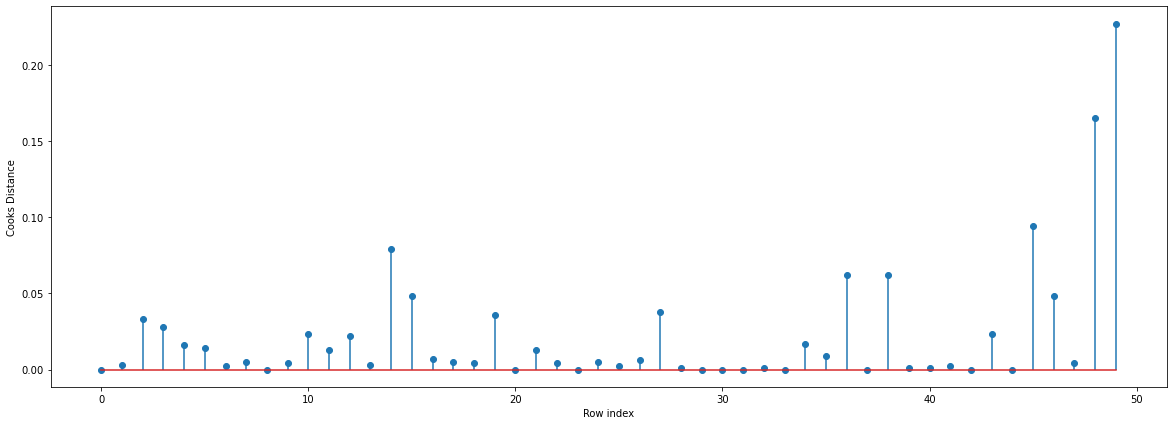

In [98]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(statrtup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [99]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.22675297057922433)

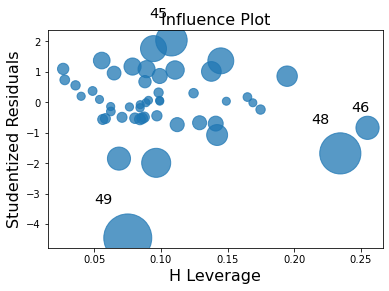

In [100]:
#influence plot
influence_plot(model1)
plt.show()

In [101]:
#Leverage value
k = statrtup.shape[1]
n = statrtup.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [116]:
pred_y = model1.predict(statrtup)
pred_y

0     155242.055289
1     150885.660542
2     142434.162297
3     133501.617183
4     131123.336976
5     123039.472567
6     107264.992890
7     118142.743157
8     109876.657242
9     112295.566785
10     90735.528492
11     91657.357437
12     85845.111473
13     84480.280179
14    105314.268650
15    102301.951586
16     75104.575222
17     88436.532940
18     87757.311701
19     61796.171451
20     76402.665089
21     77285.877665
22     74863.235519
23     70457.368931
24     65935.683671
25     55653.123078
26     63284.484195
27     76925.949872
28     54410.981501
29     53876.864995
30     50763.795840
31     49170.749982
32     48319.857733
33     55003.999238
34     46832.038831
35     47593.925837
36     33418.124337
37     46199.416256
38     27169.034160
39     39848.284411
40     31621.748612
41     31052.947869
42     26449.987786
43     11646.181150
44     15589.323017
45     -1590.900487
46     20008.906887
47     -2703.372517
48      -625.945611
49       908.340771


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

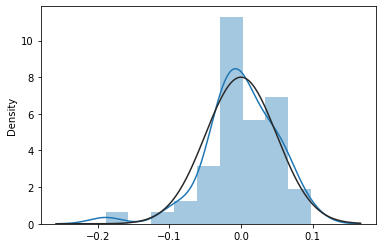

In [117]:
from scipy import stats
sns.distplot(model1.resid, fit=stats.norm)

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

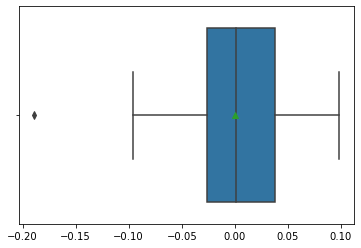

In [118]:
sns.boxplot(model1.resid, showmeans=True)

# Multiple Linear Regression by sklearn

In [102]:
# Multiple Linear Regression for 50 Startup
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [103]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [104]:
#Convert the column into categorical columns
states=pd.get_dummies(X['State'],drop_first=True)

In [105]:
# Drop the state coulmn
X=X.drop('State',axis=1)

In [107]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)
X

,R&D Spend,Administration,Marketing Spend,Florida,New York,Florida,New York
0,165349.20,136897.80,471784.10,0,1,0,1
1,162597.70,151377.59,443898.53,0,0,0,0
2,153441.51,101145.55,407934.54,1,0,1,0
3,144372.41,118671.85,383199.62,0,1,0,1
4,142107.34,91391.77,366168.42,1,0,1,0
5,131876.90,99814.71,362861.36,0,1,0,1
6,134615.46,147198.87,127716.82,0,0,0,0
7,130298.13,145530.06,323876.68,1,0,1,0
8,120542.52,148718.95,311613.29,0,1,0,1
9,123334.88,108679.17,304981.62,0,0,0,0


In [108]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [110]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

In [111]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [112]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [113]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9347068473282425